In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/CarPrice_Assignment.csv")

In [52]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [53]:
# to check for missing values
100 * df.isnull().sum()/ len(df)

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
Car_brand           0.0
dtype: float64

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

(205, 26)

In [6]:
# to check for presence of duplicated values
duplicates = df[df.duplicated()]

In [7]:
# there are no duplicated values
duplicates

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [8]:
# to remove car_id as it is not useful for analysis
df = df.drop('car_ID', axis=1)

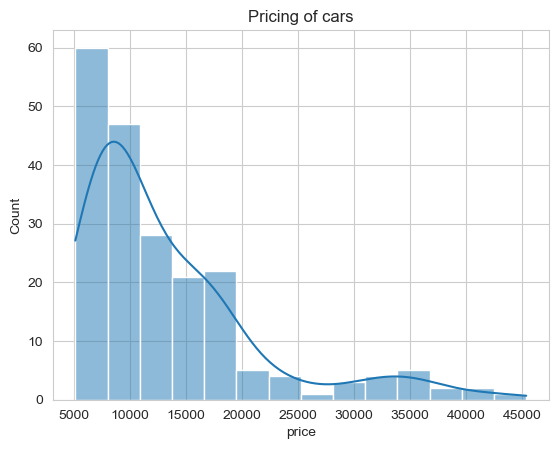

In [12]:
# to visualize price distribution of the car
sns.histplot(data=df, x='price', kde=True, edgecolor=None)
plt.title("Pricing of cars");

In [13]:
# to print only categorical variables
df.select_dtypes('object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [14]:
# to print only numeric features of the car
df.select_dtypes(['int','float'])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
# to see the correlation of all numerics in the dataset
df.select_dtypes(['int','float']).corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


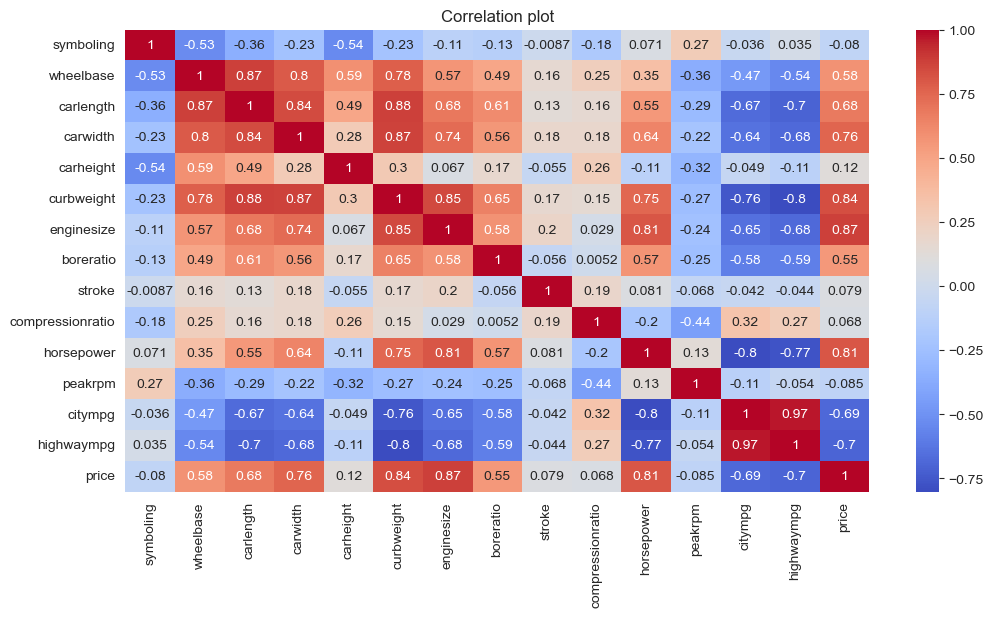

In [18]:
# Correlation heatmap
plt.figure(figsize=(12,6), dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(), cmap='coolwarm', annot=True)
plt.title('Correlation plot');

In [19]:
# correlate all numeric variables againt Price of cars
df.select_dtypes(['int','float']).corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


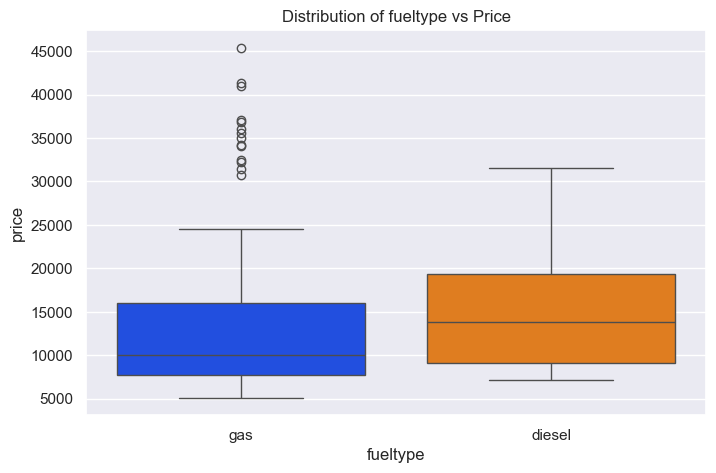

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


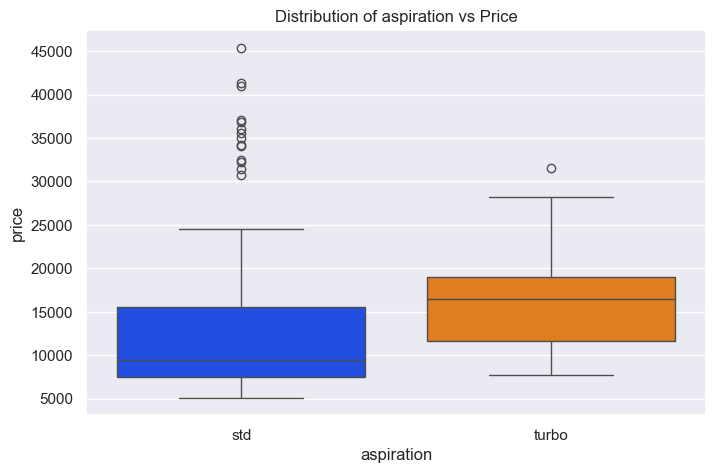

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


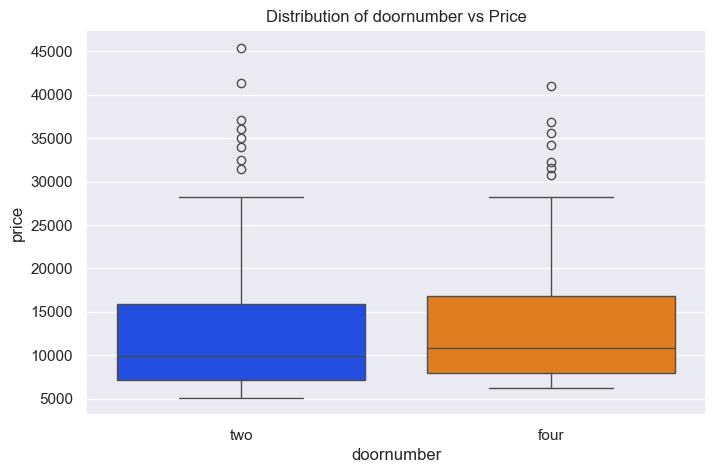

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


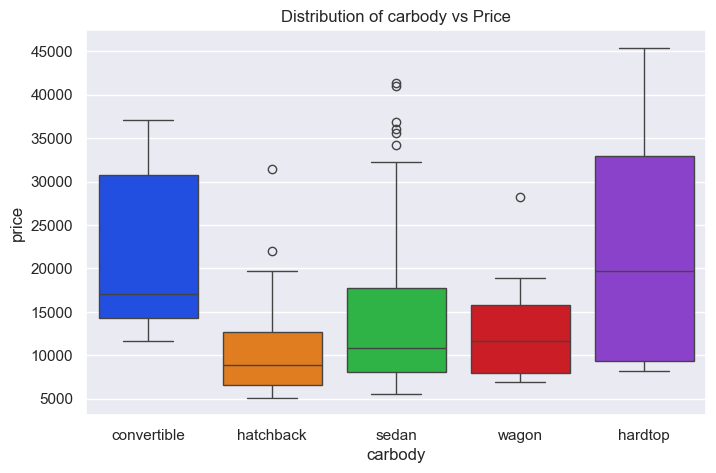

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


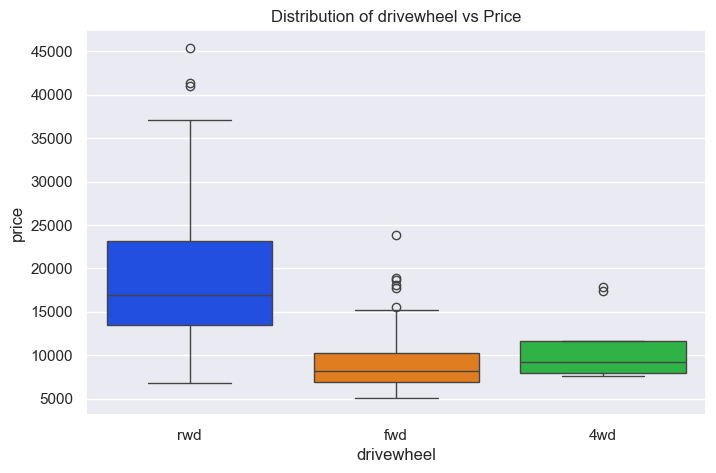

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


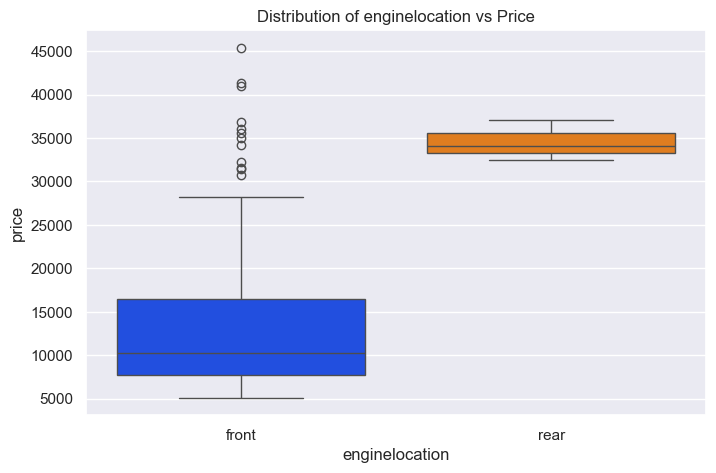

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


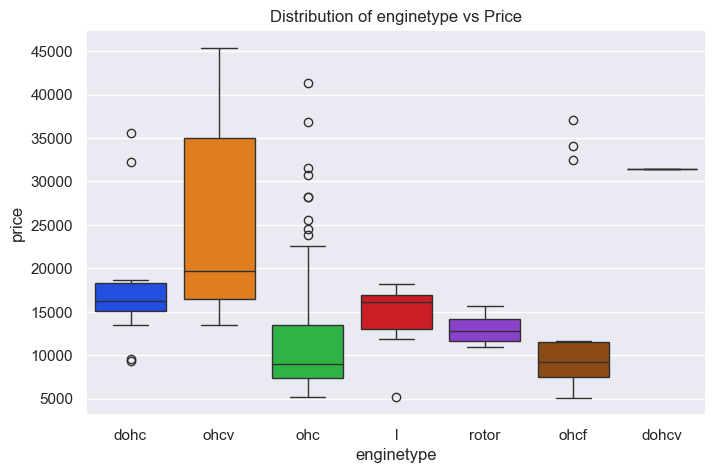

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


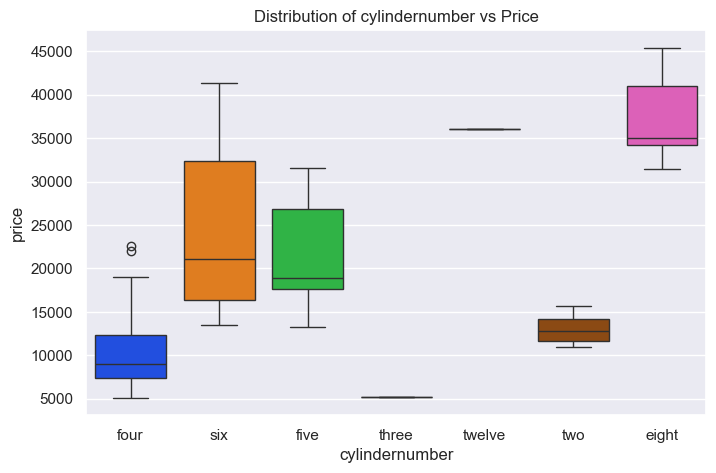

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3134673978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y='price', palette='bright')


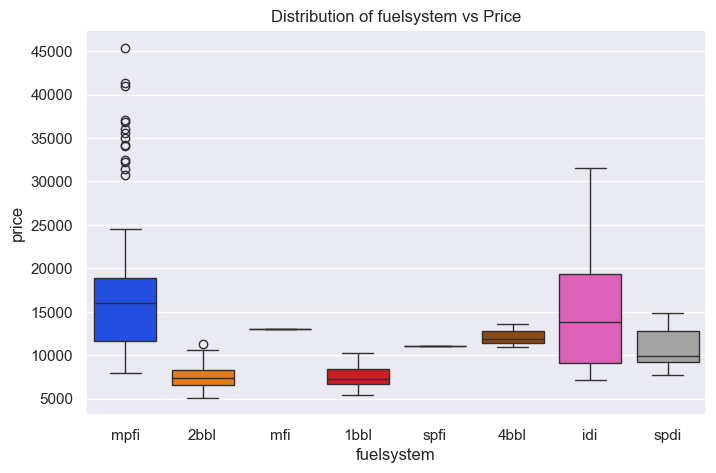

In [25]:
# Visualization of all categorical variables only
for column in df.select_dtypes(include=['object']):
    if column != 'CarName':
        plt.figure(figsize=(8,5))
        sns.boxplot(data=df, x=column, y='price', palette='bright')
        plt.title(f'Distribution of {column} vs Price')
        plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


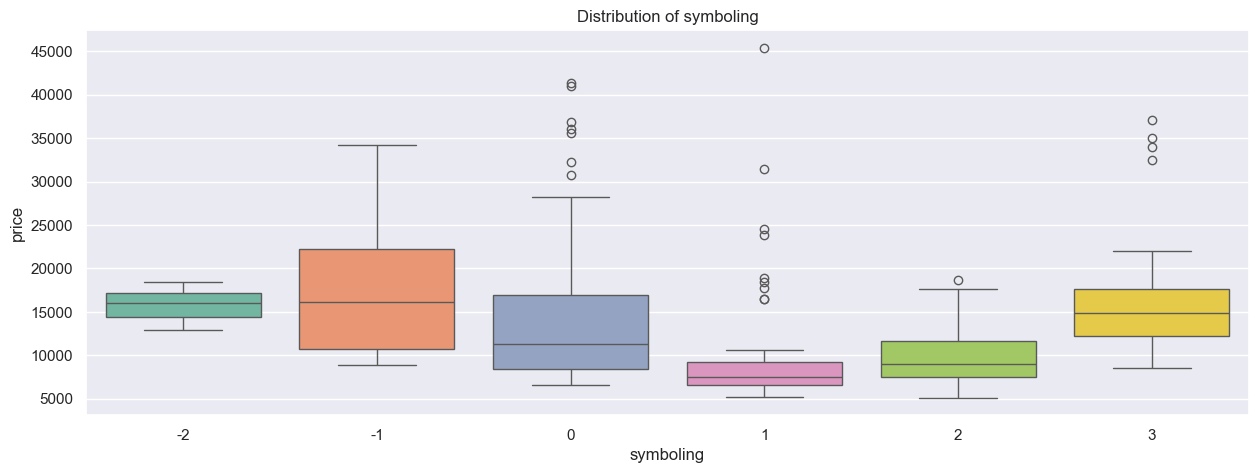

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


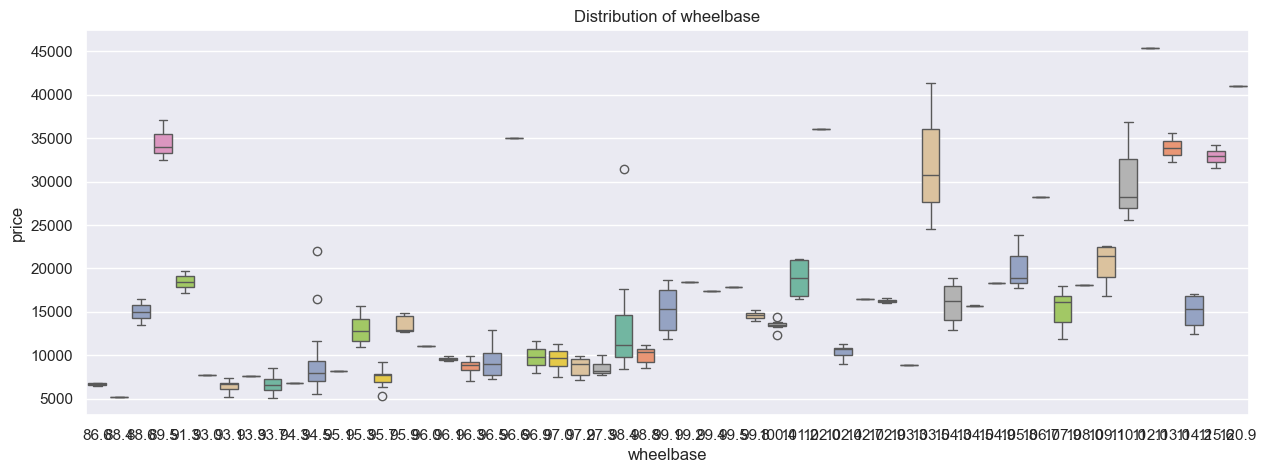

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


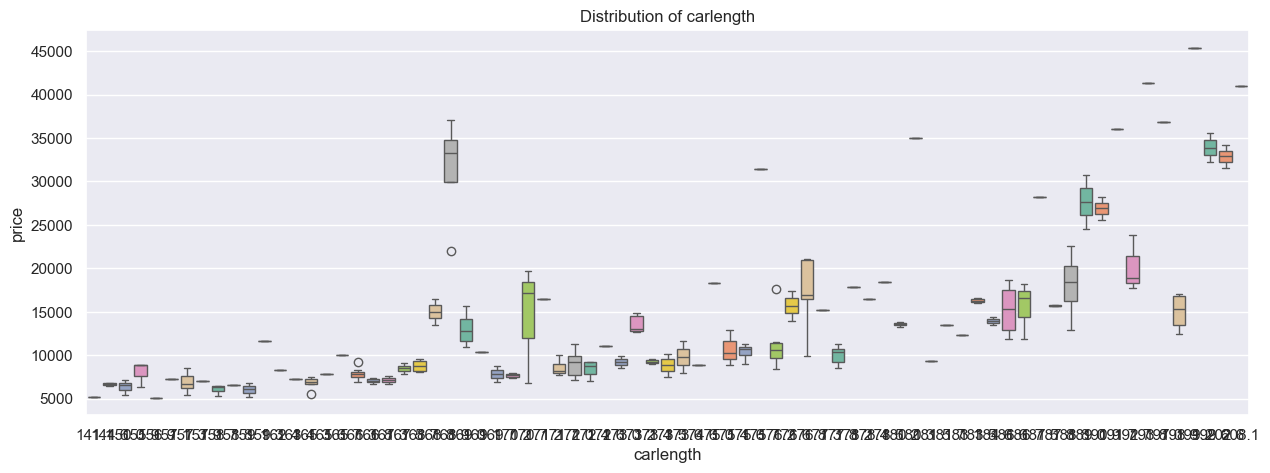

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


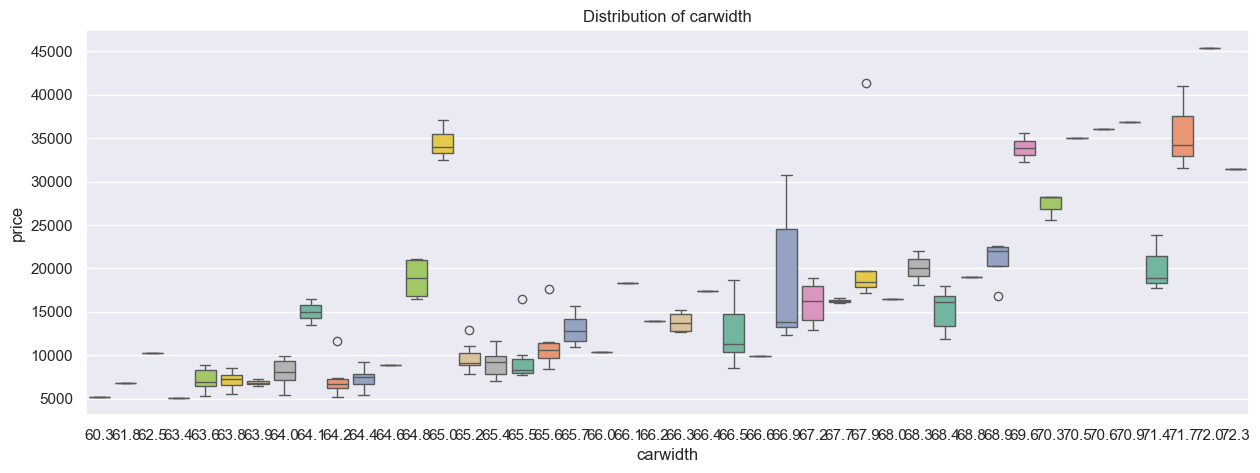

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


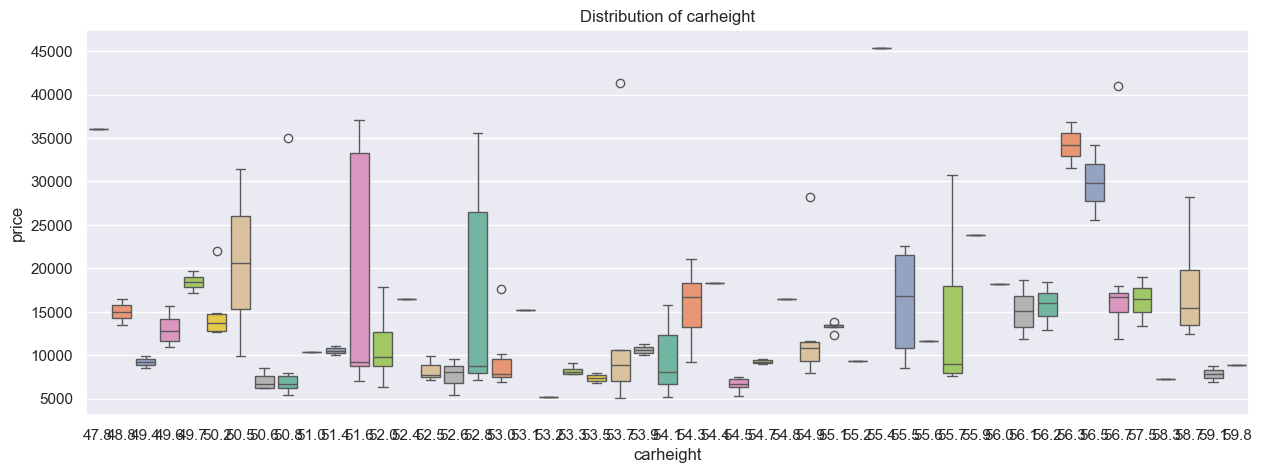

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


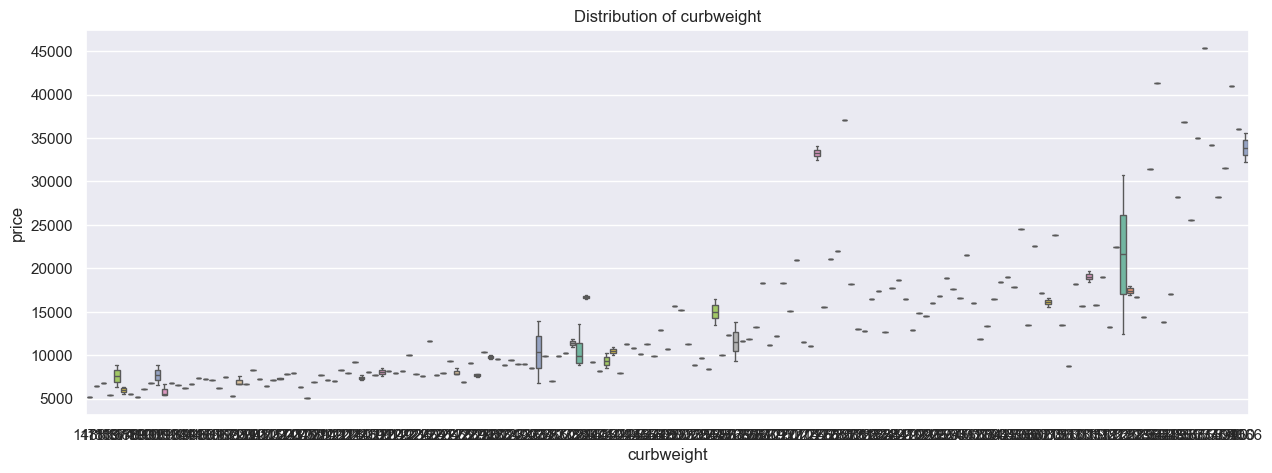

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


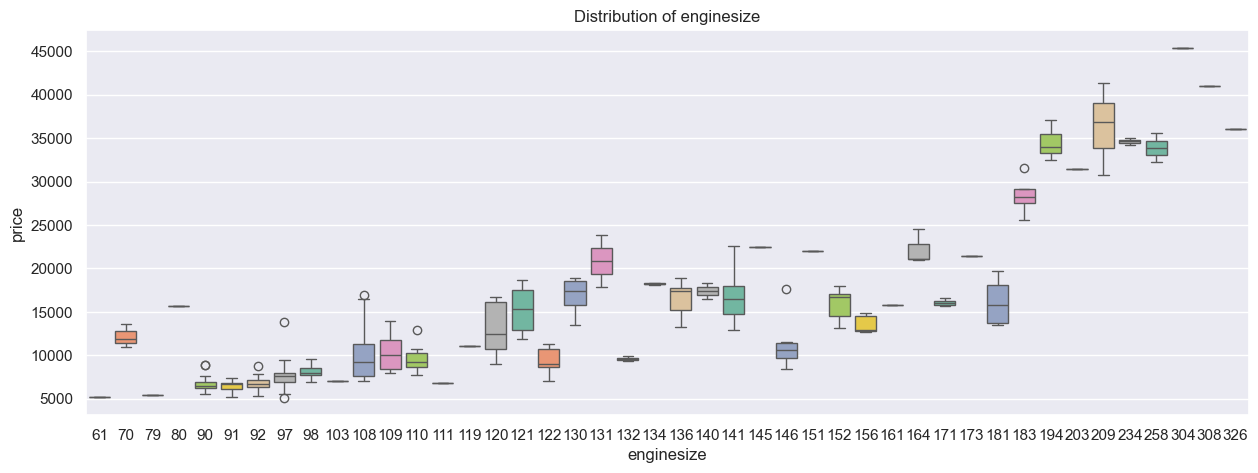

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


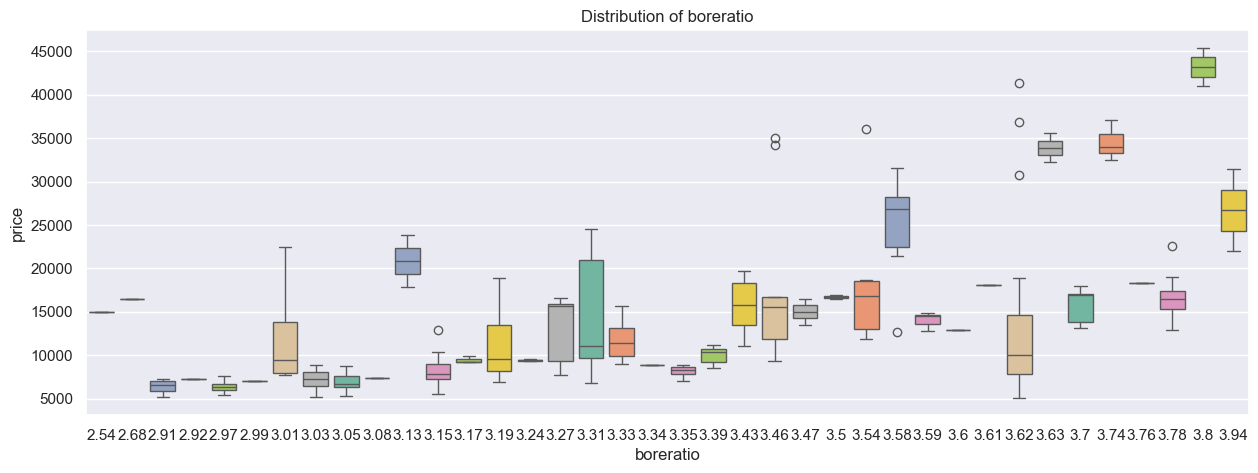

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


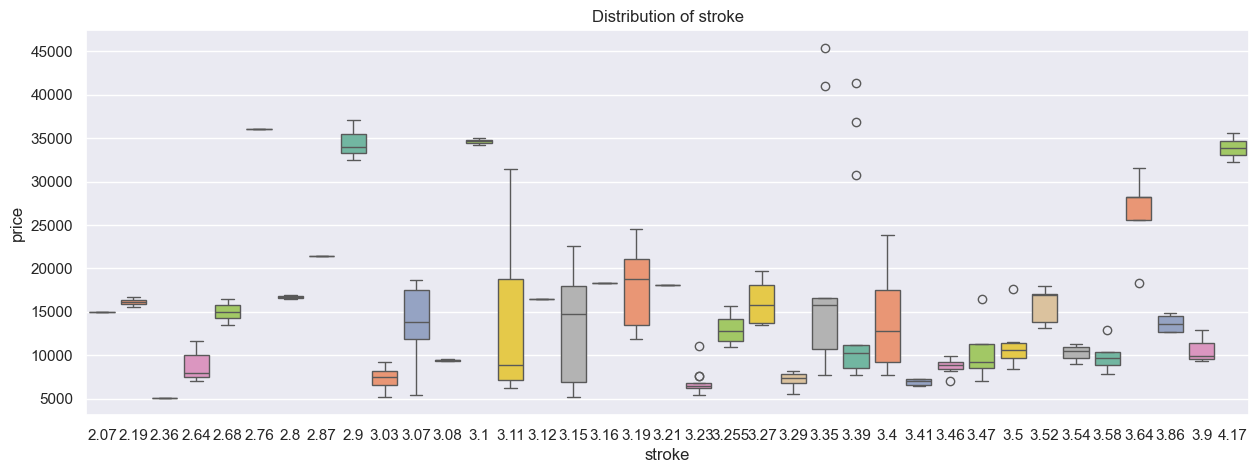

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


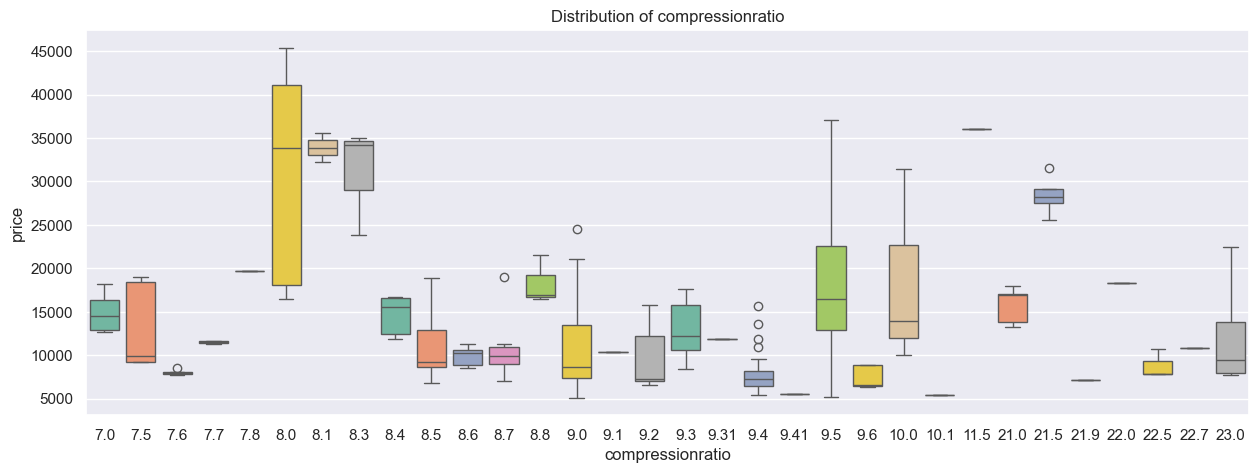

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


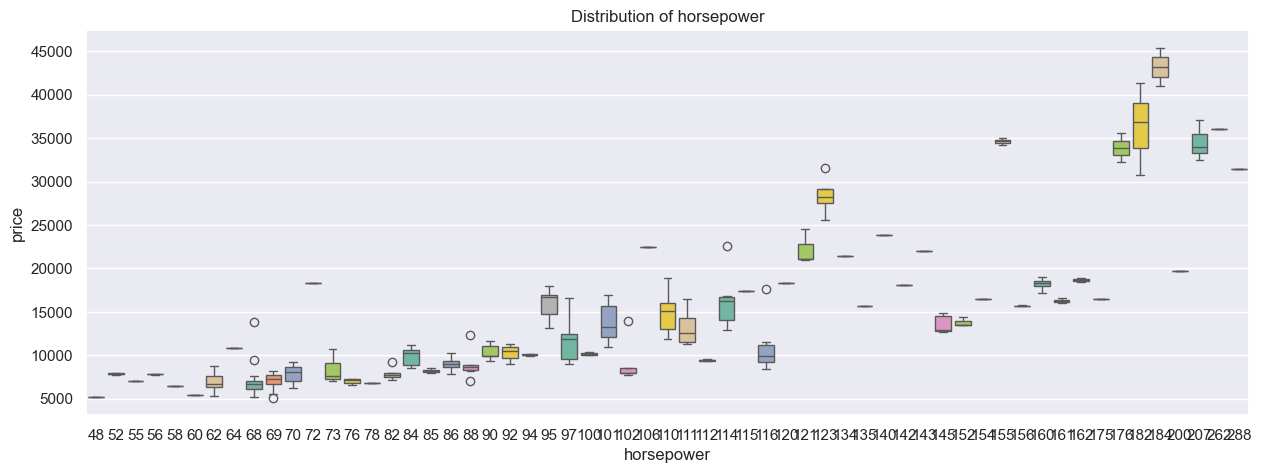

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


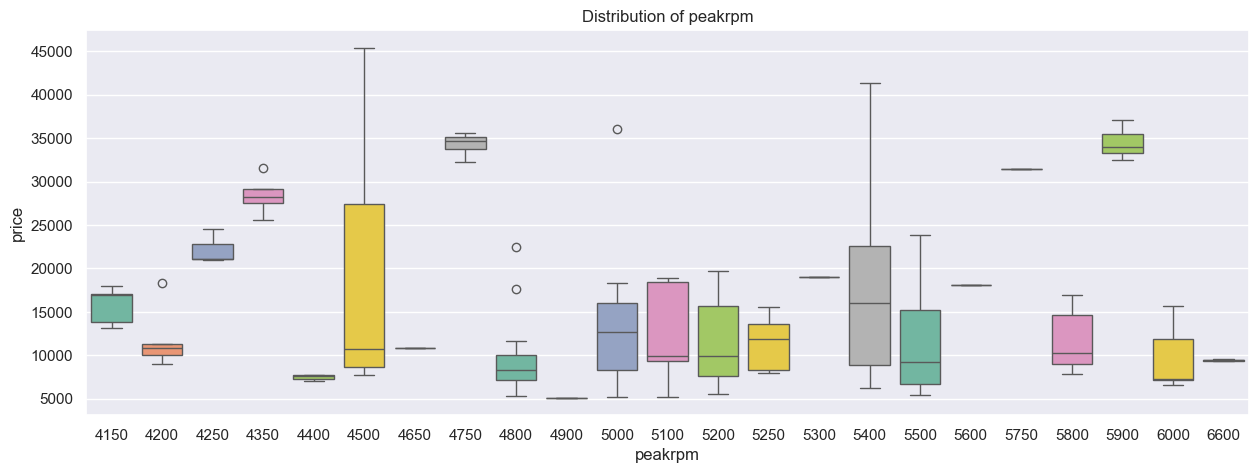

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


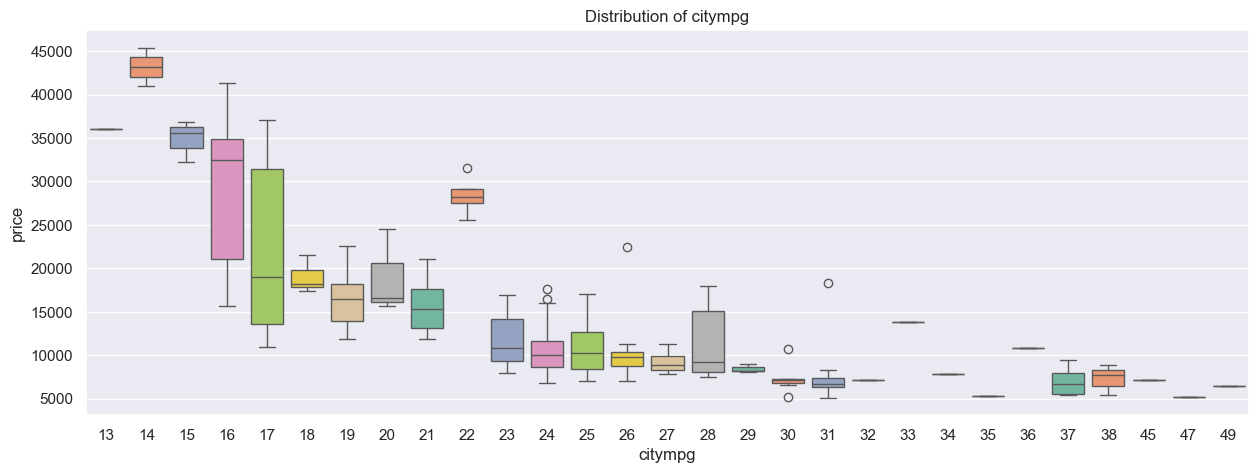

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\2045501715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, y='price', palette='Set2')


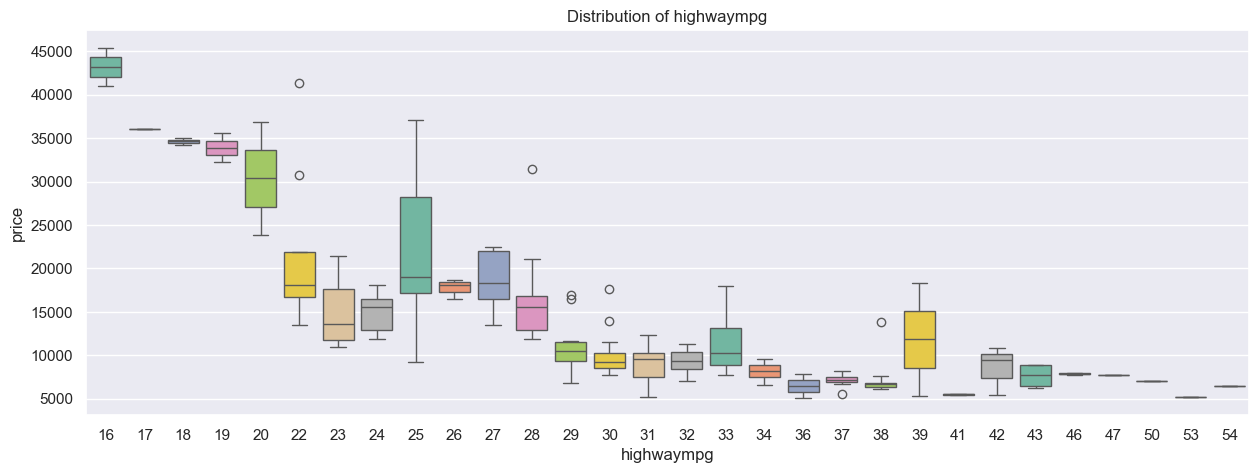

In [34]:
# to explore the distribution of numeric variables via boxplots
for feature in df.select_dtypes(include=['int','float']):
    if feature != 'price':
        plt.figure(figsize=(15,5))
        sns.boxplot(data=df, x=feature, y='price', palette='Set2')
        plt.title(f'Distribution of {feature}')
        plt.show()

In [36]:
df['CarName'].value_counts().head(15)

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
mazda 626               3
toyota mark ii          3
mitsubishi outlander    3
mitsubishi g4           3
honda civic             3
volvo 264gl             2
bmw 320i                2
isuzu D-Max             2
audi 100ls              2
volvo 244dl             2
Name: count, dtype: int64

In [37]:
# to extract the Car Brand and Model into 2 separate columns from CarName column into new variable 'Car_brand'
# index[0] - refers to the car brand (item first in string), apply .split(' ') to the gap after the first word
# alternative code = df['Car_brand'] = df['CarName'].str.split().str.get(0)
# Combining lambda with methods like map() or apply() makes it easy to process collections of strings in Python.
df['Car_brand'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [38]:
# to extract car model type from car_name as new variable
# index[1] refers to the car mod, 2nd position
df['Car_model'] = df['CarName'].str.split().str.get(1)

In [39]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_brand,Car_model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [40]:
# to see split variables side by side
df[['CarName','Car_brand','Car_model']]

,CarName,Car_brand,Car_model
0,alfa-romero giulia,alfa-romero,giulia
1,alfa-romero stelvio,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,alfa-romero,Quadrifoglio
3,audi 100 ls,audi,100
4,audi 100ls,audi,100ls
...,...,...,...
200,volvo 145e (sw),volvo,145e
201,volvo 144ea,volvo,144ea
202,volvo 244dl,volvo,244dl
203,volvo 246,volvo,246


In [41]:
# to remove CarName column as no longer useful for any analysis
df = df.drop(['CarName','Car_model'], axis=1)

In [42]:
# to print the names of all car brand
df['Car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [45]:
df['Car_brand'].nunique() # there are altogether 28 car brand names

28

In [46]:
Best_car_brand = df['Car_brand'].value_counts().head(20)

C:\Users\miche\AppData\Local\Temp\ipykernel_18892\333564954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Best_car_brand.values, y=Best_car_brand.index, palette='viridis')


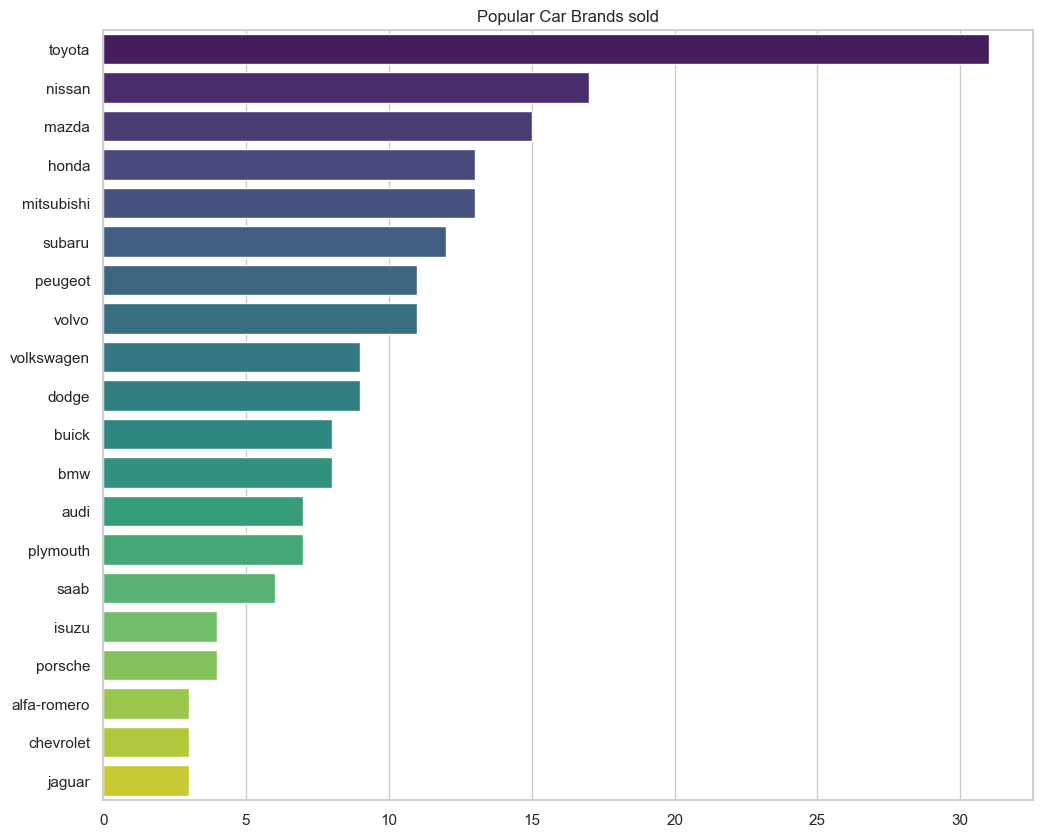

In [51]:
# visualize the best car brand sold in barplot
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(x=Best_car_brand.values, y=Best_car_brand.index, palette='viridis')
plt.title('Popular Car Brands sold', fontsize=12)
plt.ylabel("");

In [54]:
# to define X and Y
X = df.drop('price', axis=1)

In [55]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
y= df['price']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [59]:
# to scale the X train and testing set
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
# import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [61]:
# to perform cross-validation to determine which alpha value to use in Ridge regression
from sklearn.linear_model import RidgeCV

In [62]:
# perform cross validation to determine which alpha value to use in Ridge regression
# alpha = 0.1, 1.0, 10.0 are default values in Ridge CV model
ridge_cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0))

In [63]:
# to use training set for the purpose of Hyper parameter tuning for Ridge regression model
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV()

In [65]:
# to see which alpha value perform the best, alpha= 10 performs the best
ridge_cv_model.alpha_

10.0

In [66]:
# neg_mean_absolute_error, the higher the value the better, to re-run model with the scoring metric
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [67]:
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [68]:
# to see which alpha value perform the best after using the scoring metric, alpha= 10 performs the best
ridge_cv_model.alpha_

10.0

In [69]:
# print first 10 coefficients
ridge_cv_model.coef_[:10]

array([-117.83036769,  354.71389693,  364.39541912, 1488.53538688,
       -221.24582159, 1264.69230562, 2061.78483094, -274.48679035,
       -234.34556963, -163.81879099])

In [70]:
# to import Lasso Cross validation for hyperparameter tuning to prevent overfitting
from sklearn.linear_model import LassoCV

In [82]:
# default values in Lasso Cross validation
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [83]:
# to fit Lasso CV onto the training data
lasso_cv_model.fit(scaled_X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [84]:
# find the best performing alpha in Lasso Regression
lasso_cv_model.alpha_

38.57930895491049

In [85]:
# print 1st 10 numbers of the Lasso Regression model
lasso_cv_model.coef_[:10]

array([  -0.        ,   -0.        ,   -0.        , 1793.56951665,
        -82.75945907, 1283.786716  , 3737.5363962 , -698.64454723,
       -211.86149986, -106.67925236])

In [86]:
# ElasticNet = Rigde (L1) + Lasso (L2)
from sklearn.linear_model import ElasticNetCV

In [87]:
# Default values, eps=0.001, n_alphas= 100
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                               eps=0.001, n_alphas=100, max_iter=1000000)

In [88]:
# train ElasticNet on training data
elastic_cv_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [89]:
# print Elastic Net L1 ratio
elastic_cv_model.l1_ratio_

0.99

In [90]:
elastic_cv_model.alpha_

7.302078917335851

In [91]:
# to initiate instance of Decision tree regression model
dt = DecisionTreeRegressor()

In [92]:
# fit Decision tree into the training data
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [93]:
# no over-fitting on both the training and test set
print(f"Decision tree_training set score: {dt.score(scaled_X_train, y_train):.3f}")
print(f"Decision tree_testing set score: {dt.score(scaled_X_test, y_test):.3f}")

Decision tree_training set score: 0.999
Decision tree_testing set score: 0.869


In [94]:
# to predict on the X testing set
dt_test_pred = dt.predict(scaled_X_test)
dt_test_pred

array([ 6229.,  7975., 15750.,  7957., 16695., 19699., 15510.,  6849.,
        7775.,  6529., 10198., 12940.,  6189.,  6338., 11850., 11549.,
        8189., 10898.,  6229.,  6849.,  8949., 13645.,  7898.,  7609.,
        9639., 32250.,  6529.,  7788.,  7775., 13645.,  7609., 11845.,
       21485., 12964., 21105., 15985.,  7299.,  6229.,  8949., 10295.,
        6295.])

In [95]:
# to calculate the Regression metrics for testing set, Decision tree
dt_mae_test = mean_absolute_error(y_test, dt_test_pred)
dt_mse_test = mean_squared_error(y_test, dt_test_pred)
dt_rmse_test= root_mean_squared_error(y_test, dt_test_pred)
dt_r2_test = r2_score(y_test, dt_test_pred)

# to display Decision tree testing set metrics
print("Decision Tree Reg Testing metrics")
print(f"Testing MAE : {dt_mae_test:.3f}")
print(f"Testing MSE : {dt_mse_test:.3f}")
print(f"Testing RMSE : {dt_rmse_test:.3f}")
print(f"Testing R2 : {dt_r2_test:.3f}")

Decision Tree Reg Testing metrics
Testing MAE : 1366.122
Testing MSE : 4397939.634
Testing RMSE : 2097.127
Testing R2 : 0.869


In [96]:
# Decision tree: to predict on the X training set
dt_train_pred = dt.predict(scaled_X_train)
dt_train_pred

array([ 7898.   , 45400.   , 15998.   ,  5572.   , 41315.   ,  7299.   ,
        8013.   , 15040.   , 22625.   ,  5151.   ,  9720.   ,  5348.   ,
       17450.   , 30760.   , 14997.5  ,  6785.   , 11199.   , 11248.   ,
       17859.167,  7788.   ,  7295.   ,  7099.   ,  6529.   ,  8916.5  ,
        9995.   , 22470.   ,  6695.   ,  7349.   ,  9298.   , 34028.   ,
        7775.   , 13200.   , 11245.   , 13415.   ,  6229.   ,  9959.   ,
        9988.   , 21105.   ,  6795.   , 18150.   , 22018.   , 11845.   ,
       17425.   ,  6338.   ,  9989.   ,  8058.   , 17669.   ,  9495.   ,
        9980.   , 18420.   ,  8558.   ,  7126.   ,  9895.   , 17075.   ,
       21485.   , 10198.   ,  5572.   ,  7053.   , 12964.   , 14399.   ,
       31400.5  , 11048.   ,  6189.   , 13645.   , 12629.   , 25552.   ,
        8249.   ,  7689.   ,  7295.   ,  7957.   , 28248.   , 15750.   ,
        6938.   , 13295.   , 13499.   ,  7775.   ,  9279.   , 17710.   ,
        6095.   ,  8921.   , 13845.   ,  6692.   , 

In [97]:
# to calculate Regression metrics for training set, Decision Tree
dt_train_mae = mean_absolute_error(y_train, dt_train_pred)
dt_mse_train = mean_squared_error(y_train, dt_train_pred)
dt_rmse_train = root_mean_squared_error(y_train, dt_train_pred)
dt_r2_train = r2_score(y_train, dt_train_pred)

# to display the metrics
print("Decision Tree Reg Training metrics")
print(f"Training MAE : {dt_train_mae:.3f}")
print(f"Training MSE : {dt_mse_train:.3f}")
print(f"Training RMSE : {dt_rmse_train:.3f}")
print(f"Training R2 : {dt_r2_train:.3f}")

Decision Tree Reg Training metrics
Training MAE : 46.067
Training MSE : 49565.625
Training RMSE : 222.633
Training R2 : 0.999


In [98]:
# to initiate a Random Forest model
rf = RandomForestRegressor()

In [99]:
# fit rf model on the training dat
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [100]:
# no over-fitting in the random forest model
print(f"Random Forest_training set score:{rf.score(scaled_X_train, y_train):.3f}")
print(f"Random Forest_testing set score:{rf.score(scaled_X_test, y_test):.3f}")

Random Forest_training set score:0.990
Random Forest_testing set score:0.904


In [101]:
# Random Forest, predict on the training set
rf_train_pred = rf.predict(scaled_X_train)
rf_train_pred

array([ 7921.1525    , 43210.105     , 16581.06      ,  5675.96      ,
       37638.975     ,  7163.54      ,  9067.7825    , 14660.11      ,
       20623.54      ,  5340.44      ,  9661.78      ,  5789.2       ,
       16804.98167   , 32839.06      , 14755.70333333,  7642.875     ,
       11641.77      , 11014.37      , 18201.94354   ,  8050.59      ,
        7302.215     ,  7137.54      ,  6488.935     ,  8498.39      ,
        9973.53      , 21252.79      ,  6794.44      ,  7524.53      ,
        9291.81      , 33875.23      ,  7985.43      , 14835.31      ,
       10760.8325    , 13991.21      ,  6271.68      ,  9921.43      ,
       10257.43666667, 19782.81      ,  6557.83      , 17510.39167   ,
       19307.17      , 12774.0475    , 16957.685     ,  6370.97      ,
       10586.48      ,  8164.09      , 15362.2       ,  9232.09      ,
        9909.8       , 18135.78      ,  8452.63      ,  7426.73      ,
       10146.93      , 17151.9       , 20432.69      , 10076.48      ,
      

In [102]:
# to calculate Regression metrics for training set, Random Forest
rf_mae_train = mean_absolute_error(y_train, rf_train_pred)
rf_mse_train = mean_squared_error(y_train, rf_train_pred)
rf_rmse_train = root_mean_squared_error(y_train, rf_train_pred)
rf_r2_train = r2_score(y_train, rf_train_pred)

# to display the metrics
print("Random Forest Training metrics")
print(f"Training MAE : {rf_mae_train:.3f}")
print(f"Training MSE : {rf_mse_train:.3f}")
print(f"Training RMSE : {rf_rmse_train:.3f}")
print(f"Training R2 : {rf_r2_train:.3f}")

Random Forest Training metrics
Training MAE : 557.376
Training MSE : 701689.528
Training RMSE : 837.669
Training R2 : 0.990


In [103]:
# Random Forest: to predict on the X test set
rf_test_pred = rf.predict(scaled_X_test)
rf_test_pred

array([ 6232.64      ,  8292.91      , 15736.08167   ,  8108.56      ,
       16035.35      , 18301.44668   , 14180.51      ,  7075.535     ,
        8774.04      ,  6590.195     , 11131.4475    , 13969.8675    ,
        6366.69      ,  6396.73      , 14173.85916667, 11680.73      ,
        8633.62833333, 10455.58      ,  6397.53      ,  7017.895     ,
        9217.22666667, 13170.03666667,  7634.39      ,  6822.96      ,
       10130.28      , 34430.41      ,  6351.37      ,  8179.78      ,
        8152.06      , 11700.43      ,  7119.745     , 12774.0475    ,
       20382.93167   , 14924.23667   , 17994.005     , 14725.06      ,
        7149.32      ,  6081.27      ,  9143.1       ,  9812.54333333,
        5943.14      ])

In [104]:
# to calculate Regression metrics for testing set
rf_mae_test = mean_absolute_error(y_test, rf_test_pred)
rf_mse_test = mean_squared_error(y_test, rf_test_pred)
rf_mse_test = root_mean_squared_error(y_test, rf_test_pred)
rf_r2_test = r2_score(y_test, rf_test_pred)

# to display Random Forest metrics
print("Random Forest testing set")
print(f"Testing MAE: {rf_mae_test:.3f}")
print(f"Testing MSE: {rf_mse_test:.3f}")
print(f"Testing RMSE: {rf_mse_test:.3f}")
print(f"Testing R2: {rf_r2_test:.3f}")

Random Forest testing set
Testing MAE: 1218.512
Testing MSE: 1791.399
Testing RMSE: 1791.399
Testing R2: 0.904


In [105]:
# AdaBoost regressor
ada = AdaBoostRegressor()

In [106]:
# to fit the AdaBoost to the training model
ada.fit(scaled_X_train, y_train)

AdaBoostRegressor()

In [107]:
print(f"AdaBoost_training set score: {ada.score(scaled_X_train, y_train):.3f}")
print(f"AdaBoost_testing set score: {ada.score(scaled_X_test, y_test):.3f}")

AdaBoost_training set score: 0.961
AdaBoost_testing set score: 0.862


In [108]:
# to predict on the training set
ada_train_pred = ada.predict(scaled_X_train)
ada_train_pred

array([ 8446.92307692, 42676.66666667, 17463.38666667,  7901.86206897,
       40399.16666667,  8042.95454545,  9707.44444444, 14316.5       ,
       19910.93716393,  7901.86206897,  9563.46153846,  7901.86206897,
       15787.95      , 32024.96153846, 14673.13043478,  8720.80769231,
       13170.91296667, 11343.5106383 , 17417.13235294,  8720.80769231,
        8202.23529412,  8439.625     ,  8389.13690476,  7901.86206897,
        9515.94117647, 19968.60238571,  8202.23529412,  8042.95454545,
        9825.16129032, 34858.85714286,  9042.27906977, 15052.5       ,
        9573.85714286, 15631.96125581,  7901.86206897, 11364.2826087 ,
       11343.5106383 , 19614.375     ,  7907.6875    , 17831.73095714,
       19747.88888889, 14091.82978723, 15052.5       ,  7901.86206897,
       13170.91296667,  8446.92307692, 14850.97435897,  9042.27906977,
        9042.27906977, 15787.95      ,  9042.27906977,  8446.92307692,
       11364.2826087 , 15785.        , 19972.02244231,  9488.07142857,
      

In [109]:
# to calculate the Regression metrics for the Training set
ada_mae_train = mean_absolute_error(y_train, ada_train_pred)
ada_mse_train = mean_squared_error(y_train, ada_train_pred)
ada_rmse_train = root_mean_squared_error(y_train, ada_train_pred)
ada_r2_train = r2_score(y_train, ada_train_pred)

# to display the metrics
print("AdaBoost Training metrics")
print(f"Training MAE: {ada_mae_train:.3f}")
print(f"Training MSE: {ada_mse_train:.3f}")
print(f"Training RMSE: {ada_rmse_train:.3f}")
print(f"Training R2: {ada_r2_train:.3f}")

AdaBoost Training metrics
Training MAE: 1394.521
Training MSE: 2717476.042
Training RMSE: 1648.477
Training R2: 0.961


In [110]:
# to predict on the X testing set
ada_test_pred = ada.predict(scaled_X_test)
ada_test_pred

array([ 7901.86206897,  8906.45454545, 16560.55264912,  8906.45454545,
       15102.21212121, 16870.78688525, 14316.5       ,  8042.95454545,
        9042.27906977,  8389.13690476, 12286.61016949, 15258.45454545,
        7907.6875    ,  7901.86206897, 13994.24324324, 11913.9       ,
        8690.32758621, 11279.78947368,  8202.23529412,  8042.95454545,
        9344.25      , 13381.57303371,  8446.92307692,  8202.23529412,
       13169.43478261, 33819.6       ,  7907.6875    ,  8720.80769231,
        9042.27906977,  9825.16129032,  7901.86206897, 14091.82978723,
       19840.7       , 15745.83146067, 15745.83146067, 15787.95      ,
        8042.95454545,  7901.86206897,  9344.25      ,  9344.25      ,
        8389.13690476])

In [111]:
# to calculate the Regression metrics for the Testing set
ada_mae_test = mean_absolute_error(y_test, ada_test_pred)
ada_mse_test = mean_squared_error(y_test, ada_test_pred)
ada_rmse_test = root_mean_squared_error(y_test, ada_test_pred)
ada_r2_test = r2_score(y_test, ada_test_pred)

# to display the metrics
print("AdaBoost Testing metrics")
print(f"Testing MAE: {ada_mae_test:.3f}")
print(f"Testing MSE: {ada_mse_test:.3f}")
print(f"Testing RMSE: {ada_rmse_test:.3f}")
print(f"Testing R2: {ada_r2_test:.3f}")

AdaBoost Testing metrics
Testing MAE: 1695.584
Testing MSE: 4628582.800
Testing RMSE: 2151.414
Testing R2: 0.862


In [112]:
# GradientBoost regressor
gbr = GradientBoostingRegressor()

In [113]:
gbr.fit(scaled_X_train, y_train)

GradientBoostingRegressor()

In [115]:
print(f"Gradient Boost training set score: {gbr.score(scaled_X_train, y_train):.3f}")
print(f"Gradient Boost testing set score: {gbr.score(scaled_X_test, y_test):.3f}")

Gradient Boost training set score: 0.993
Gradient Boost testing set score: 0.906


In [116]:
# to predict on X training data
gbr_train_pred = gbr.predict(scaled_X_train)
gbr_train_pred

array([ 7467.82692507, 44853.80480166, 16659.11653963,  5940.06205899,
       40488.64485437,  7214.22272792,  8790.15248116, 14468.17552964,
       21117.40704214,  5214.07269383,  9828.2950705 ,  6001.42902642,
       17242.6325798 , 31535.60203167, 14630.4098464 ,  7334.92378204,
       11193.60911173, 10950.71622607, 18088.78030036,  8014.18093072,
        7435.73194669,  7291.66312003,  6401.59538757,  8269.04611173,
       10133.92324924, 22406.53965768,  6811.17522327,  7500.00228958,
        9685.83245401, 34265.50366077,  8081.15420694, 14819.84667292,
        9969.97441548, 14166.77844593,  6175.54161909,  9944.00645612,
       10778.18500334, 21129.00987534,  6518.69108103, 18115.93009815,
       21424.8798029 , 12654.59418685, 16170.30121116,  6539.26181702,
       11056.49604927,  7983.70821919, 15150.13923283,  9315.95798823,
        9790.52470111, 18275.59037997,  8848.47419769,  7706.14713429,
        9619.74369129, 16211.65572769, 20978.58638868,  9751.84178267,
      

In [117]:
# to calculate the Regression metrics for the Training set
gbr_mae_train = mean_absolute_error(y_train, gbr_train_pred)
gbr_mse_train = mean_squared_error(y_train, gbr_train_pred)
gbr_rmse_train = root_mean_squared_error(y_train, gbr_train_pred)
gbr_r2_train = r2_score(y_train, gbr_train_pred)

# to display the metrics
print("Gradient Boost Training metrics")
print(f"Training MAE: {gbr_mae_train:.3f}")
print(f"Training MSE: {gbr_mse_train:.3f}")
print(f"Training RMSE: {gbr_rmse_train:.3f}")
print(f"Training R2: {gbr_r2_train:.3f}")

Gradient Boost Training metrics
Training MAE: 514.860
Training MSE: 460850.077
Training RMSE: 678.859
Training R2: 0.993


In [118]:
# to predict on X testing dat
gbr_test_pred = gbr.predict(scaled_X_test)
gbr_test_pred

array([ 6175.54161909,  8554.03617334, 15781.42426299,  7922.85909312,
       16264.37076365, 19204.28095983, 13761.47964268,  7173.15119102,
        8425.73388613,  6401.59538757, 10688.09937822, 14975.73661391,
        6290.29986629,  6539.26181702, 12730.59609265, 11125.62145857,
        8433.40206944, 10519.69557807,  6551.68426263,  7173.15119102,
        8984.72747629, 12526.47174547,  7595.40282869,  6811.17522327,
       11193.60911173, 32763.10063598,  6474.89296609,  8078.65698902,
        8081.15420694, 11008.17129156,  6757.23431921, 12654.59418685,
       20398.29538012, 16291.1119441 , 19263.79561019, 15066.2892864 ,
        7214.22272792,  6119.33744694,  8852.66437767,  9512.86772733,
        6166.10760496])

In [119]:
# to calculate the Regression metrics for the Testing set
gbr_mae_test = mean_absolute_error(y_test, gbr_test_pred)
gbr_mse_test = mean_squared_error(y_test, gbr_test_pred)
gbr_rmse_test = root_mean_squared_error(y_test, gbr_test_pred)
gbr_r2_test = r2_score(y_test, gbr_test_pred)

# to display the metrics
print("Gradient Boost Testing metrics")
print(f"Testing MAE: {gbr_mae_test:.3f}")
print(f"Testing MSE: {gbr_mse_test:.3f}")
print(f"Testing RMSE: {gbr_rmse_test:.3f}")
print(f"Testing R2: {gbr_r2_test:.3f}")

Gradient Boost Testing metrics
Testing MAE: 1179.372
Testing MSE: 3142942.958
Testing RMSE: 1772.835
Testing R2: 0.906


In [120]:
# to initialise the XGBoost model
xgb = XGBRegressor()

In [121]:
xgb.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
print(f"XGBoost training set score: {xgb.score(scaled_X_train, y_train):.3f}")
print(f"XGBoost testing set score: {xgb.score(scaled_X_test, y_test):.3f}")

XGBoost training set score: 0.999
XGBoost testing set score: 0.888


In [123]:
# to predict on the training data
xgb_train_pred = xgb.predict(scaled_X_train)
xgb_train_pred

array([ 7895.817 , 45400.18  , 16003.884 ,  5572.362 , 41313.66  ,
        7296.5767,  8012.1323, 15039.004 , 22624.86  ,  5151.7134,
        9718.827 ,  5352.945 , 17449.262 , 30761.129 , 14997.844 ,
        6787.759 , 11187.95  , 11239.216 , 17859.59  ,  7788.261 ,
        7297.6543,  7100.2495,  6529.6636,  8916.504 ,  9996.809 ,
       22471.133 ,  6693.9277,  7351.217 ,  9296.365 , 34030.758 ,
        7776.131 , 13208.742 , 11234.441 , 13414.642 ,  6233.524 ,
        9951.723 , 10003.748 , 21106.592 ,  6791.651 , 18151.504 ,
       22017.256 , 11856.887 , 17420.469 ,  6335.1147,  9982.574 ,
        8069.1816, 17666.275 ,  9494.889 ,  9981.831 , 18419.906 ,
        8557.873 ,  7126.253 ,  9895.224 , 17068.83  , 21484.135 ,
       10197.8125,  5572.7197,  7049.4224, 12961.75  , 14398.784 ,
       31400.14  , 11048.541 ,  6183.114 , 13630.099 , 12634.44  ,
       25559.318 ,  8249.694 ,  7695.284 ,  7294.7134,  7957.4766,
       28247.91  , 15750.212 ,  6939.972 , 13296.424 , 13505.1

In [124]:
# to calculate the Regression metrics for the Training set
xgb_mae_train = mean_absolute_error(y_train, xgb_train_pred)
xgb_mse_train = mean_squared_error(y_train, xgb_train_pred)
xgb_rmse_train = root_mean_squared_error(y_train, xgb_train_pred)
xgb_r2_train = r2_score(y_train, xgb_train_pred)

# to display the metrics
print("XGBoost Training metrics")
print(f"Training MAE: {xgb_mae_train:.3f}")
print(f"Training MSE: {xgb_mse_train:.3f}")
print(f"Training RMSE: {xgb_rmse_train:.3f}")
print(f"Training R2: {xgb_r2_train:.3f}")

XGBoost Training metrics
Training MAE: 49.629
Training MSE: 49595.350
Training RMSE: 222.700
Training R2: 0.999


In [125]:
# to predict on the X testing set
xgb_test_pred = xgb.predict(scaled_X_test)
xgb_test_pred

array([ 6182.571 ,  7996.891 , 14930.179 ,  7822.242 , 14899.985 ,
       18956.244 , 13159.5205,  7072.1143,  8686.8545,  6570.93  ,
        9612.505 , 15569.091 ,  6387.3647,  6091.7715, 12475.895 ,
        9412.766 ,  8291.246 , 10831.345 ,  6664.8677,  7020.482 ,
        8603.728 , 12517.071 ,  7501.5483,  6693.9277,  9650.409 ,
       32250.973 ,  6062.131 ,  7978.0977,  8189.823 , 12055.595 ,
        7599.483 , 11856.887 , 19162.627 , 15241.827 , 17906.555 ,
       14961.372 ,  6946.582 ,  6004.812 ,  9090.584 , 10377.48  ,
        6291.7524], dtype=float32)

In [126]:
# to calculate the Regression metrics for the Training set
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)
xgb_rmse_test = root_mean_squared_error(y_test, xgb_test_pred)
xgb_r2_test = r2_score(y_test, xgb_test_pred)

# to display the metrics
print("XGBoost Testing metrics")
print(f"Testing MAE: {xgb_mae_test:.3f}")
print(f"Testing MSE: {xgb_mse_test:.3f}")
print(f"Testing RMSE: {xgb_rmse_test:.3f}")
print(f"Testing R2: {xgb_r2_test:.3f}")

XGBoost Testing metrics
Testing MAE: 1251.315
Testing MSE: 3762131.441
Testing RMSE: 1939.621
Testing R2: 0.888


In [127]:
# to initialize Support Vector Machine
svr = SVR()

In [128]:
svr.fit(scaled_X_train, y_train)

SVR()

In [129]:
# overfitting is observed on the training and testing model of Support Vector machine
print(f"Support Vector machine training set score: {svr.score(scaled_X_train, y_train):.3f}")
print(f"Support Vector machine testing set score: {svr.score(scaled_X_test, y_test):.3f}")

Support Vector machine training set score: -0.122
Support Vector machine testing set score: 0.001


In [130]:
# to predict on the X training data
svr_train_pred = elastic_cv_model.predict(scaled_X_train)
svr_train_pred

array([ 6609.59597197, 39314.72880454, 18886.39684485,  5723.74451294,
       32048.20074589,  6844.24548681,  8951.76766246, 15737.59595391,
       19043.71574734,  4858.99417625, 10665.02798733,  5960.91872232,
       15687.43964475, 30276.76842911, 14757.46260591,  8520.92023135,
       13427.52534395,  9857.15274268, 19353.26212371,  6282.40938779,
        7212.05109687,  5934.50470604,  7350.35243536,  7744.07164848,
       10319.1828264 , 21006.48843814,  6593.8650863 ,  6051.15546372,
        9639.77335338, 34651.63437415,  7956.4758745 , 16146.62106021,
       10135.33691436, 15719.85783315,  5731.97944098, 10045.03733075,
        9758.61170246, 23487.11401854,  5991.58405084, 17702.36135867,
       21688.57734316, 12841.80374377, 16269.79736049,  6084.09502259,
       11860.35784305,  8294.21519716, 14042.73344445,  9609.60187956,
       10120.96479489, 18414.49298343,  9314.46685687,  8850.32668141,
        9907.52958342, 16771.84969996, 20625.76569563,  8880.35607805,
      

In [131]:
# to calculate the Regression metrics for the Training set
svr_mae_train = mean_absolute_error(y_train, svr_train_pred)
svr_mse_train = mean_squared_error(y_train, svr_train_pred)
svr_rmse_train = root_mean_squared_error(y_train, svr_train_pred)
svr_r2_train = r2_score(y_train, svr_train_pred)

# to display the metrics
print("Support Vector Machine Training metrics")
print(f"Training MAE: {svr_mae_train:.3f}")
print(f"Training MSE: {svr_mse_train:.3f}")
print(f"Training RMSE: {svr_rmse_train:.3f}")
print(f"Training R2: {svr_r2_train:.3f}")

Support Vector Machine Training metrics
Training MAE: 1138.146
Training MSE: 2629340.111
Training RMSE: 1621.524
Training R2: 0.962


In [132]:
# to predict on the X testing data
svr_test_pred = elastic_cv_model.predict(scaled_X_test)
svr_test_pred

array([ 5296.74586898,  9572.06523437, 18760.49292877,  7372.36357806,
       14621.94760436, 17311.43742257, 14568.06842719,  8422.41114699,
       10084.6326781 ,  7386.18554089, 11113.07398698, 12850.86253368,
        6090.97174037,  5479.91777698, 10823.99056422, 10696.80107443,
        9522.50295358, 10338.49237246,  6538.98028084,  6770.33970664,
       12453.2752575 , 11403.17745289,  6390.1537397 ,  6567.05981947,
       13116.22523962, 31434.88718299,  6247.06406642,  7105.17409244,
        8043.05494472,  9476.0058403 ,  6615.46515429, 12841.80374377,
       20136.22451606, 18324.71575607, 23912.12573647, 15737.77438592,
        6340.84885052,  6064.91618291,  9906.43155311, 10709.70725499,
        6021.35508098])

In [135]:
# to calculate the Regression metrics for the Testing set
svr_mae_test = mean_absolute_error(y_test, svr_test_pred)
svr_mse_test = mean_squared_error(y_test, svr_test_pred)
svr_rmse_test = root_mean_squared_error(y_test, svr_test_pred)
svr_r2_test = r2_score(y_test, svr_test_pred)

# to display the metrics
print("Support Vector Machine Testing metrics")
print(f"Testing MAE: {svr_mae_test:.3f}")
print(f"Testing MSE: {svr_mse_test:.3f}")
print(f"Testing RMSE: {svr_rmse_test:.3f}")
print(f"Testing R2: {svr_r2_test:.3f}")

Support Vector Machine Testing metrics
Testing MAE: 1583.278
Testing MSE: 5027611.413
Testing RMSE: 2242.234
Testing R2: 0.850


In [136]:
knn = KNeighborsRegressor()

In [137]:
# to initialize the KNN regressor
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [138]:
print(f"KNN regressor training set score:{knn.score(scaled_X_train, y_train):.3f}")
print(f"KNN regressor training set score: {knn.score(scaled_X_test, y_test):.3f}")

KNN regressor training set score:0.864
KNN regressor training set score: 0.712


In [139]:
# to predict on the training data
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred

array([ 8246.    , 36755.2   , 14352.6   ,  6311.8   , 30925.    ,
        7649.    ,  8115.    , 15834.    , 17363.    ,  5941.4   ,
        9545.    ,  7096.    , 18428.8334, 30925.    , 13840.4   ,
        8386.8   , 12009.    ,  9538.    , 18428.8334,  8715.6   ,
        8101.8   ,  7966.    ,  8101.8   ,  7858.8   , 10410.    ,
       18211.6   ,  8695.    ,  7689.    , 10910.4   , 22782.4   ,
        8831.    , 15797.    ,  9885.    , 15627.    ,  7185.    ,
       11927.    ,  9538.    , 30925.    ,  8835.    , 15791.    ,
       14152.6   , 12115.    , 15797.    ,  7096.    , 11738.6   ,
        8046.    , 11692.8   , 10665.6   , 10322.4   , 17363.    ,
        7185.    ,  7488.4   , 10395.2   , 15797.    , 17976.    ,
        8552.    ,  7185.    ,  6935.    ,  8256.    , 15899.    ,
       19504.7   ,  9443.    ,  6920.8   , 12115.    , 11927.    ,
       27209.2   ,  7509.    , 10885.    ,  8101.8   ,  7185.    ,
       26130.2   , 18693.    ,  7898.    , 10410.    , 15899. 

In [140]:
# to calculate the Regression metrics for the Training set
knn_mae_train = mean_absolute_error(y_train, knn_train_pred)
knn_mse_train = mean_squared_error(y_train, knn_train_pred)
knn_rmse_train = root_mean_squared_error(y_train, knn_train_pred)
knn_r2_train = r2_score(y_train, knn_train_pred)

# to display the metrics
print("KNN Regressor Training metrics")
print(f"Training MAE: {knn_mae_train:.3f}")
print(f"Training MSE: {knn_mse_train:.3f}")
print(f"Training RMSE: {knn_rmse_train:.3f}")
print(f"Training R2: {knn_r2_train:.3f}")

KNN Regressor Training metrics
Training MAE: 2017.613
Training MSE: 9396860.177
Training RMSE: 3065.430
Training R2: 0.864


In [141]:
# to predict on the X testing seg
knn_test_pred = knn.predict(scaled_X_test)
knn_test_pred

array([ 7198.4, 10410. , 18376.6,  8065.2, 15791. , 15899. , 15834. ,
        7616.4,  8101.8,  8101.8,  8614.4,  9885. ,  6920.8,  6836. ,
        8681.8,  9604.2,  7504.8,  9666. ,  7938.6,  7649. ,  8101.8,
        8101.8,  8014. ,  8695. , 12009. , 31440.6,  6667.4,  8663.6,
        9945.8,  8067.4,  7185. , 12115. , 17363. , 16190. , 30925. ,
       15627. ,  7649. ,  7185. ,  7779. ,  8101.8,  7938.6])

In [142]:
# to calculate the Regression metrics for the Testing set
knn_mae_test = mean_absolute_error(y_test, knn_test_pred)
knn_mse_test = mean_squared_error(y_test, knn_test_pred)
knn_rmse_test = root_mean_squared_error(y_test, knn_test_pred)
knn_r2_test = r2_score(y_test, knn_test_pred)

# to display the metrics
print("KNN Regressor Testing metrics")
print(f"Testing MAE: {knn_mae_test:.3f}")
print(f"Testing MSE: {knn_mse_test:.3f}")
print(f"Testing RMSE: {knn_rmse_test:.3f}")
print(f"Testing R2: {knn_r2_test:.3f}")

KNN Regressor Testing metrics
Testing MAE: 2129.634
Testing MSE: 9635524.811
Testing RMSE: 3104.114
Testing R2: 0.712


In [148]:
# to initialise on the Linear Regression model
lr = LinearRegression()

In [149]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [150]:
print(f"Linear Regression training set score: {lr.score(scaled_X_train, y_train):.3f}")
print(f"Linear Regression training set score: {lr.score(scaled_X_test, y_test):.3f}")

Linear Regression training set score: 0.971
Linear Regression training set score: -1011407976551986266898432.000


In [151]:
# to predict on the X training data
lr_train_pred = elastic_cv_model.predict(scaled_X_train)
lr_train_pred

array([ 6609.59597197, 39314.72880454, 18886.39684485,  5723.74451294,
       32048.20074589,  6844.24548681,  8951.76766246, 15737.59595391,
       19043.71574734,  4858.99417625, 10665.02798733,  5960.91872232,
       15687.43964475, 30276.76842911, 14757.46260591,  8520.92023135,
       13427.52534395,  9857.15274268, 19353.26212371,  6282.40938779,
        7212.05109687,  5934.50470604,  7350.35243536,  7744.07164848,
       10319.1828264 , 21006.48843814,  6593.8650863 ,  6051.15546372,
        9639.77335338, 34651.63437415,  7956.4758745 , 16146.62106021,
       10135.33691436, 15719.85783315,  5731.97944098, 10045.03733075,
        9758.61170246, 23487.11401854,  5991.58405084, 17702.36135867,
       21688.57734316, 12841.80374377, 16269.79736049,  6084.09502259,
       11860.35784305,  8294.21519716, 14042.73344445,  9609.60187956,
       10120.96479489, 18414.49298343,  9314.46685687,  8850.32668141,
        9907.52958342, 16771.84969996, 20625.76569563,  8880.35607805,
      

In [152]:
# to calculate the Regression metrics for the Training set
lr_mae_train = mean_absolute_error(y_train, lr_train_pred)
lr_mse_train = mean_squared_error(y_train, lr_train_pred)
lr_rmse_train = root_mean_squared_error(y_train, lr_train_pred)
lr_r2_train = r2_score(y_train, lr_train_pred)

# to display the metrics
print("Logistic Regression Training metrics")
print(f"Training MAE: {lr_mae_train:.3f}")
print(f"Training MSE: {lr_mse_train:.3f}")
print(f"Training RMSE: {lr_rmse_train:.3f}")
print(f"Training R2: {lr_r2_train:.3f}")

Logistic Regression Training metrics
Training MAE: 1138.146
Training MSE: 2629340.111
Training RMSE: 1621.524
Training R2: 0.962


In [153]:
# to predict on X testing data
lr_test_pred = elastic_cv_model.predict(scaled_X_train)
lr_test_pred

array([ 6609.59597197, 39314.72880454, 18886.39684485,  5723.74451294,
       32048.20074589,  6844.24548681,  8951.76766246, 15737.59595391,
       19043.71574734,  4858.99417625, 10665.02798733,  5960.91872232,
       15687.43964475, 30276.76842911, 14757.46260591,  8520.92023135,
       13427.52534395,  9857.15274268, 19353.26212371,  6282.40938779,
        7212.05109687,  5934.50470604,  7350.35243536,  7744.07164848,
       10319.1828264 , 21006.48843814,  6593.8650863 ,  6051.15546372,
        9639.77335338, 34651.63437415,  7956.4758745 , 16146.62106021,
       10135.33691436, 15719.85783315,  5731.97944098, 10045.03733075,
        9758.61170246, 23487.11401854,  5991.58405084, 17702.36135867,
       21688.57734316, 12841.80374377, 16269.79736049,  6084.09502259,
       11860.35784305,  8294.21519716, 14042.73344445,  9609.60187956,
       10120.96479489, 18414.49298343,  9314.46685687,  8850.32668141,
        9907.52958342, 16771.84969996, 20625.76569563,  8880.35607805,
      

In [158]:
# to calculate the Regression metrics for the Testing set
lr_mae_test = mean_absolute_error(lr_test_pred, y_test)
lr_mse_test = mean_squared_error(lr_test_pred, y_test)
lr_rmse_test = root_mean_squared_error(lr_test_pred, y_test)
lr_r2_test = r2_score(lr_test_pred, y_test)

# to display the metrics
print("Logistic Regression Testing metrics")
print(f"Testing MAE: {lr_mae_test:.3f}")
print(f"Testing MSE: {lr_mse_test:.3f}")
print(f"Testing RMSE: {lr_rmse_test:.3f}")
print(f"Testing R2: {lr_r2_test:.3f}")

In [159]:
# Random Forest Regressor model has the smallest RMSE
# for regression problem, the smaller the root mean square error, the more accurate the prediction model
rf.feature_importances_

array([1.16365873e-03, 6.70008478e-03, 1.24813647e-02, 1.75395513e-02,
       3.68184932e-03, 1.21643655e-01, 6.76358909e-01, 3.03011779e-03,
       4.12173095e-03, 8.65638428e-03, 2.56640509e-02, 4.31336766e-03,
       1.22927258e-02, 8.22315921e-02, 1.09770925e-03, 1.15110224e-03,
       6.08996101e-04, 4.86894671e-04, 9.45046773e-04, 8.46866752e-04,
       2.65129900e-04, 3.50931128e-04, 2.26057692e-04, 1.11791085e-05,
       9.87306921e-06, 1.05712117e-04, 9.28937847e-04, 1.74555191e-05,
       5.79035600e-05, 2.30157946e-05, 6.01621168e-04, 7.46963869e-04,
       6.27161765e-04, 2.25536678e-07, 2.44796025e-06, 2.41505200e-06,
       3.14584747e-04, 2.27742918e-05, 4.46128935e-04, 7.70163473e-07,
       1.15456021e-03, 9.36267502e-06, 6.38811214e-06, 1.19001972e-05,
       5.02167774e-04, 6.11298218e-03, 1.23738114e-04, 2.51301284e-05,
       1.56294371e-05, 1.51291308e-05, 3.56588537e-04, 9.71139527e-05,
       3.45797176e-06, 2.07163723e-04, 2.53546549e-05, 1.22750702e-04,
      

In [160]:
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_brand_alfa-romero',
       'Car_brand_audi', 'Car_brand_bmw', 'Car_brand_buick',
       'Car_brand_chevrolet', 'Car_brand_dodge', 'Car_brand_honda',
       '

In [163]:
rf_feat = pd.DataFrame(index= X.columns, data= rf.feature_importances_, columns=['Importance'])

In [164]:
rf_feat = rf_feat.sort_values('Importance', ascending=False)

In [165]:
rf_feat

,Importance
enginesize,6.763589e-01
curbweight,1.216437e-01
highwaympg,8.223159e-02
horsepower,2.566405e-02
carwidth,1.753955e-02
...,...
Car_brand_vokswagen,3.169853e-06
cylindernumber_twelve,2.447960e-06
cylindernumber_two,2.415052e-06
fuelsystem_mfi,7.701635e-07


In [166]:
# using conditional filtering, to remove features of importance less than 1
rf_imp_feat = rf_feat[rf_feat['Importance'] > 0.001]

In [167]:
rf_imp_feat

,Importance
enginesize,0.676359
curbweight,0.121644
highwaympg,0.082232
horsepower,0.025664
carwidth,0.017540
carlength,0.012481
citympg,0.012293
compressionratio,0.008656
wheelbase,0.006700
Car_brand_bmw,0.006113


C:\Users\miche\AppData\Local\Temp\ipykernel_18892\3776263992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp_feat, x='Importance', y=rf_imp_feat.index, palette='Paired')


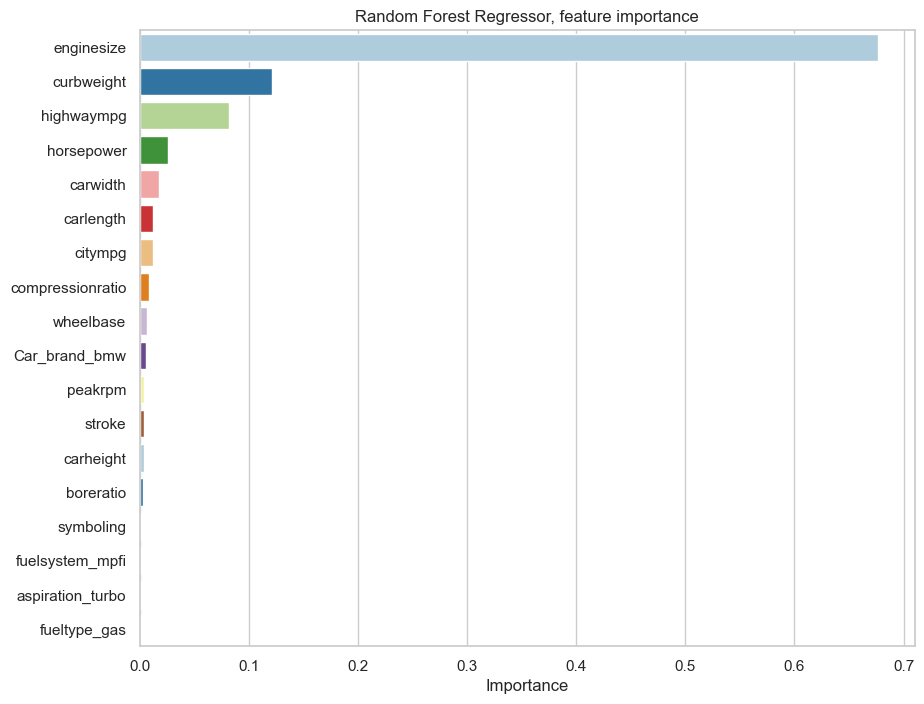

In [170]:
# to visualize in a barplot format
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=rf_imp_feat, x='Importance', y=rf_imp_feat.index, palette='Paired')
plt.title("Random Forest Regressor, feature importance", fontsize=12)
plt.ylabel("");